#Analisis Perbandingan Algoritma Bank Note Authentication

##Import Libraries

In [37]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##Load Dataset

In [38]:
# Access Dataset
data = pd.read_csv('/content/BankNoteAuthentication.csv')
# Data preparation and Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('SubSet of Data:\n ', data.head(), '\n')

Number of Rows:  1372
Number of Columns:  5 

SubSet of Data:
     variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 



##Data Preperation

In [39]:
# labeling data
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target']
data.columns = labels
print('Columns Names:', data.columns, '\n')
print('Data Describe:\n ', data.describe(), '\n')
print('Data Information:'); print(data.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1 

In [40]:
# Check For duplicated
print(data.duplicated().any())
duplicated = data.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  24


##Split Data

In [45]:
# Data Split
x = data.drop('Target', axis=1).values
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(960, 4)
(960,)


##Logistic Regression

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Accuracy of Logistic Regression Algorithm:  98.7864077669903


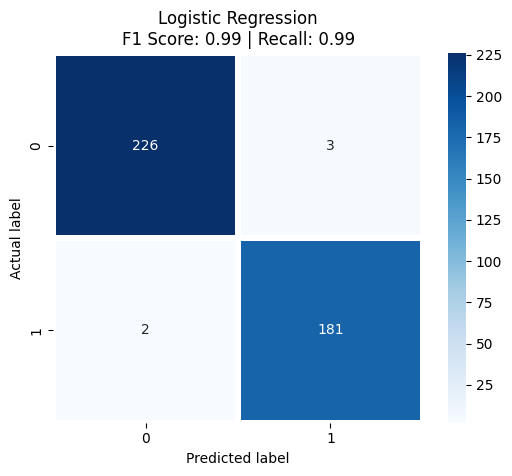

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve

# Logistic Regression
log = LogisticRegression()

# fitting data
log.fit(X_train, y_train)

# Predicted data
y_predicted_log = log.predict(X_test)

# Logistic Regression Results
print('Classification Report (Logistic Regression):')
print(metrics.classification_report(y_test, y_predicted_log))

# Accuracy score matrix
accuracy_log = metrics.accuracy_score(y_test, y_predicted_log) * 100
print('Accuracy of Logistic Regression Algorithm: ', accuracy_log)

# F1 Score
f1_score_log = metrics.f1_score(y_test, y_predicted_log, average='micro')

# Confusion matrix
cm_log = metrics.confusion_matrix(y_test, y_predicted_log)

# Recall
recall_log = metrics.recall_score(y_test, y_predicted_log)

# ROC AUC Score (Logistic Regression)
roc_auc_log = roc_auc_score(y_test, log.predict_proba(X_test)[:,1])

# Support
support_log = metrics.classification_report(y_test, y_predicted_log, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Logistic Regression\nF1 Score: {f1_score_log:.2f} | Recall: {recall_log:.2f}')
plt.show()

##KNN Algorithm

Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of KNN Algorithm:  100.0


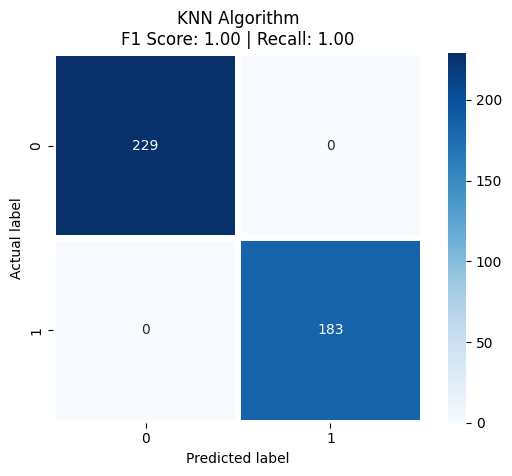

In [56]:
# KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)

# fitting training data
knn.fit(X_train, y_train)

# predicted data
y_predicted_knn = knn.predict(X_test)

# KNN Results
print("Classification Report (KNN):")
print(metrics.classification_report(y_test, y_predicted_knn))

# Accuracy score matrix
accuracy_knn = metrics.accuracy_score(y_test, y_predicted_knn) * 100
print('Accuracy of KNN Algorithm: ', accuracy_knn)

# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predicted_knn, average='micro')

# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_predicted_knn)

# Recall
recall_knn = metrics.recall_score(y_test, y_predicted_knn)

# ROC AUC Score (KNN)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

# Support
support_knn = metrics.classification_report(y_test, y_predicted_knn, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'KNN Algorithm\nF1 Score: {f1_score_knn:.2f} | Recall: {recall_knn:.2f}')
plt.show()

##Naive Bayes Algorithm

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       229
           1       0.86      0.75      0.80       183

    accuracy                           0.84       412
   macro avg       0.84      0.83      0.83       412
weighted avg       0.84      0.84      0.84       412

Accuracy of Naive Bayes Algorithm:  83.7378640776699


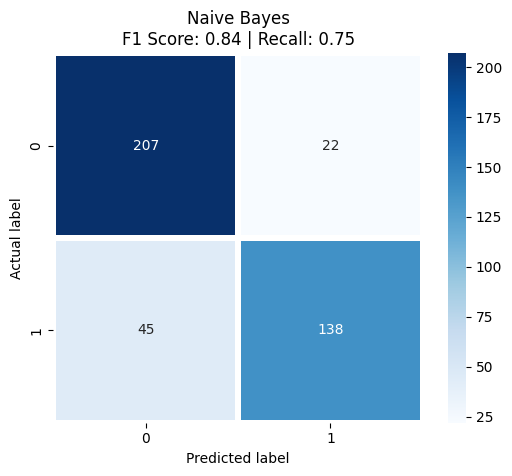

In [57]:
# Naive Bayes Algorithm
gnb = GaussianNB()

# fitting training data
gnb.fit(X_train, y_train)

# predicted data
y_predicted_NB = gnb.predict(X_test)

# Naive Bayes Results
print('Classification Report (Naive Bayes):')
print(metrics.classification_report(y_test, y_predicted_NB))

# Accuracy score matrix
accuracy_NB = metrics.accuracy_score(y_test, y_predicted_NB) * 100
print('Accuracy of Naive Bayes Algorithm: ', accuracy_NB)

# F1 Score
f1_score_NB = metrics.f1_score(y_test, y_predicted_NB, average='micro')

# Confusion matrix
cm_mnb = metrics.confusion_matrix(y_test, y_predicted_NB)

# Recall
recall_NB = metrics.recall_score(y_test, y_predicted_NB)

# ROC AUC Score (Naive Bayes)
roc_auc_NB = roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])

# Support
support_NB = metrics.classification_report(y_test, y_predicted_NB, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_mnb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Naive Bayes\nF1 Score: {f1_score_NB:.2f} | Recall: {recall_NB:.2f}')
plt.show()

##SVM Algorithm

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of SVM Algorithm:  100.0


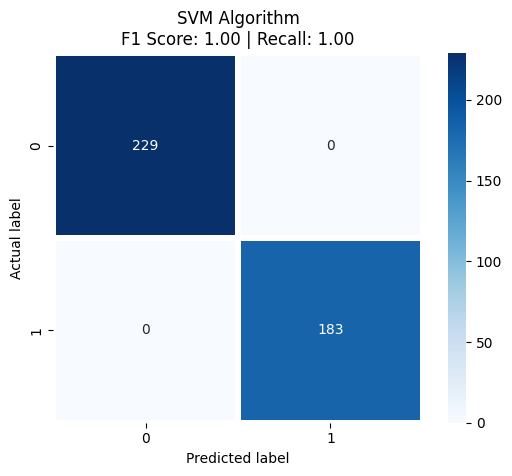

In [61]:
# Support Vector Machine
# The best SVM "rdf kernel and C=100"
# SVM dengan probability=True untuk memungkinkan predict_proba
svm = SVC(kernel='rbf', C=100.0, probability=True)

# Fitting data
svm.fit(X_train, y_train)

# Predicted data
y_predicted_SVM = svm.predict(X_test)

# SVM Results
print('Classification Report (SVM):')
print(metrics.classification_report(y_test, y_predicted_SVM))

# Accuracy score matrix
accuracy_SVM = metrics.accuracy_score(y_test, y_predicted_SVM) * 100
print('Accuracy of SVM Algorithm: ', accuracy_SVM)

# F1 Score
f1_score_SVM = metrics.f1_score(y_test, y_predicted_SVM, average='micro')

# Confusion matrix
cm_SVM = metrics.confusion_matrix(y_test, y_predicted_SVM)

# Recall
recall_SVM = metrics.recall_score(y_test, y_predicted_SVM)

# ROC AUC Score (SVM)
roc_auc_SVM = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

# Support
support_SVM = metrics.classification_report(y_test, y_predicted_SVM, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_SVM, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'SVM Algorithm\nF1 Score: {f1_score_SVM:.2f} | Recall: {recall_SVM:.2f}')
plt.show()

##Analisis Perbandingan Algoritma

###Perbandingan Skor F1 Score, Recall, Precision, precisions, Accuracy

<ipython-input-66-7ed1bead9610>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df[scores_df['Metric'] == 'F1 Score'], x='Score', y='Model', palette='magma', ax=axes[0, 0])
<ipython-input-66-7ed1bead9610>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df[scores_df['Metric'] == 'Recall'], x='Score', y='Model', palette='viridis', ax=axes[0, 1])
<ipython-input-66-7ed1bead9610>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df[scores_df['Metric'] == 'Precision'], x='Score', y='Model', palette='coolwarm

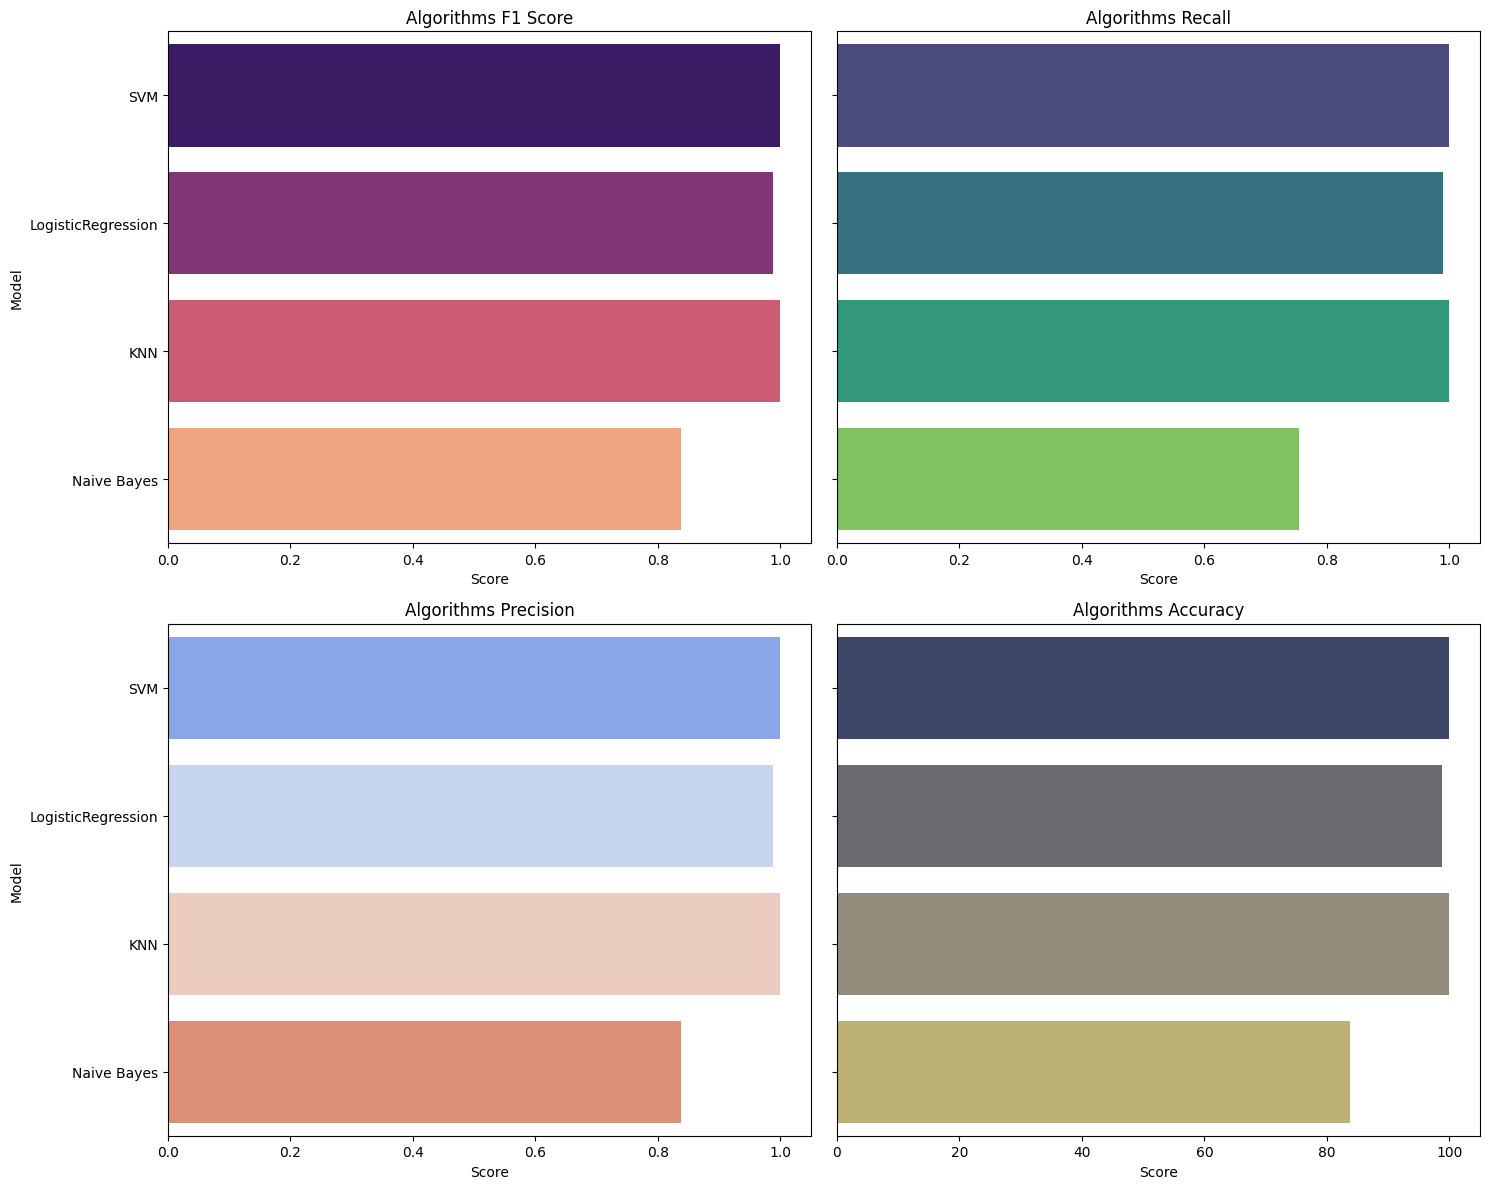

In [66]:
# Creating the Comparison DataFrame
model_f1_score = [f1_score_SVM, f1_score_log, f1_score_knn, f1_score_NB]
recalls = [recall_SVM, recall_log, recall_knn, recall_NB]
precisions = [precision_SVM, precision_log, precision_knn, precision_NB]
accuracies = [accuracy_SVM, accuracy_log, accuracy_knn, accuracy_NB]
roc_auc_scores = [roc_auc_SVM, roc_auc_log, roc_auc_knn, roc_auc_NB]
supports = [support_SVM, support_log, support_knn, support_NB]
model_name = ['SVM', 'LogisticRegression', 'KNN', 'Naive Bayes']

# Merging data for easier visualization
scores_df = pd.DataFrame({
    'Model': model_name,
    'F1 Score': model_f1_score,
    'Recall': recalls,
    'Precision': precisions,
    'Accuracy': accuracies,
    'ROC AUC': roc_auc_scores,
    'Support': supports
}).melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting the comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)
sns.barplot(data=scores_df[scores_df['Metric'] == 'F1 Score'], x='Score', y='Model', palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Algorithms F1 Score')
sns.barplot(data=scores_df[scores_df['Metric'] == 'Recall'], x='Score', y='Model', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Algorithms Recall')
sns.barplot(data=scores_df[scores_df['Metric'] == 'Precision'], x='Score', y='Model', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Algorithms Precision')
sns.barplot(data=scores_df[scores_df['Metric'] == 'Accuracy'], x='Score', y='Model', palette='cividis', ax=axes[1, 1])
axes[1, 1].set_title('Algorithms Accuracy')

plt.tight_layout()
plt.show()

###ROC Curve Data
Grafik ROC curve untuk setiap model untuk membandingkan performa mereka dalam hal trade-off antara true positive rate (TPR) dan false positive rate (FPR).

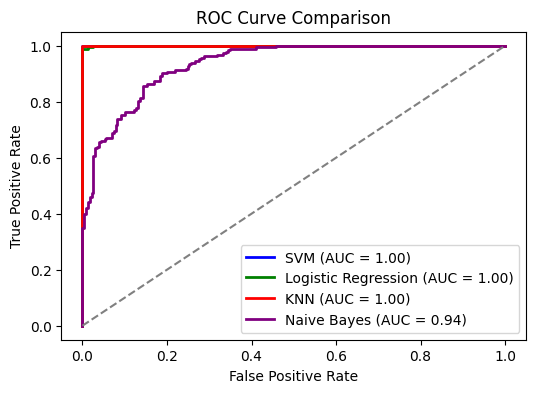

In [79]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve data
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_log, tpr_log, _ = roc_curve(y_test, log.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

###Precision-Recall Curve Data
Menghitung dan memplot Precision-Recall curve untuk tiap model.

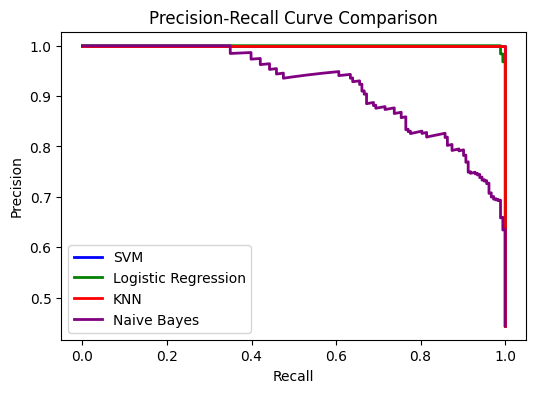

In [80]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve data
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm.predict_proba(X_test)[:, 1])
precision_log, recall_log, _ = precision_recall_curve(y_test, log.predict_proba(X_test)[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
precision_nb, recall_nb, _ = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'SVM')
plt.plot(recall_log, precision_log, color='green', lw=2, label=f'Logistic Regression')
plt.plot(recall_knn, precision_knn, color='red', lw=2, label=f'KNN')
plt.plot(recall_nb, precision_nb, color='purple', lw=2, label=f'Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.show()

###Cross-validation Model
Cross-validation untuk mengevaluasi performa model dengan lebih akurat, termasuk nilai mean dan standar deviasi dari skor.

In [82]:
from sklearn.model_selection import cross_val_score

# Cross-validation for each model
cv_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
cv_log = cross_val_score(log, X_train, y_train, cv=5, scoring='accuracy')
cv_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_nb = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy for SVM: {cv_svm.mean():.2f} ± {cv_svm.std():.2f}")
print(f"Cross-validation accuracy for Logistic Regression: {cv_log.mean():.2f} ± {cv_log.std():.2f}")
print(f"Cross-validation accuracy for KNN: {cv_knn.mean():.2f} ± {cv_knn.std():.2f}")
print(f"Cross-validation accuracy for Naive Bayes: {cv_nb.mean():.2f} ± {cv_nb.std():.2f}")

Cross-validation accuracy for SVM: 1.00 ± 0.00
Cross-validation accuracy for Logistic Regression: 0.99 ± 0.01
Cross-validation accuracy for KNN: 1.00 ± 0.00
Cross-validation accuracy for Naive Bayes: 0.84 ± 0.02


###Learning Curve
Learning curve membantu untuk melihat bagaimana model bekerja seiring dengan peningkatan jumlah data.

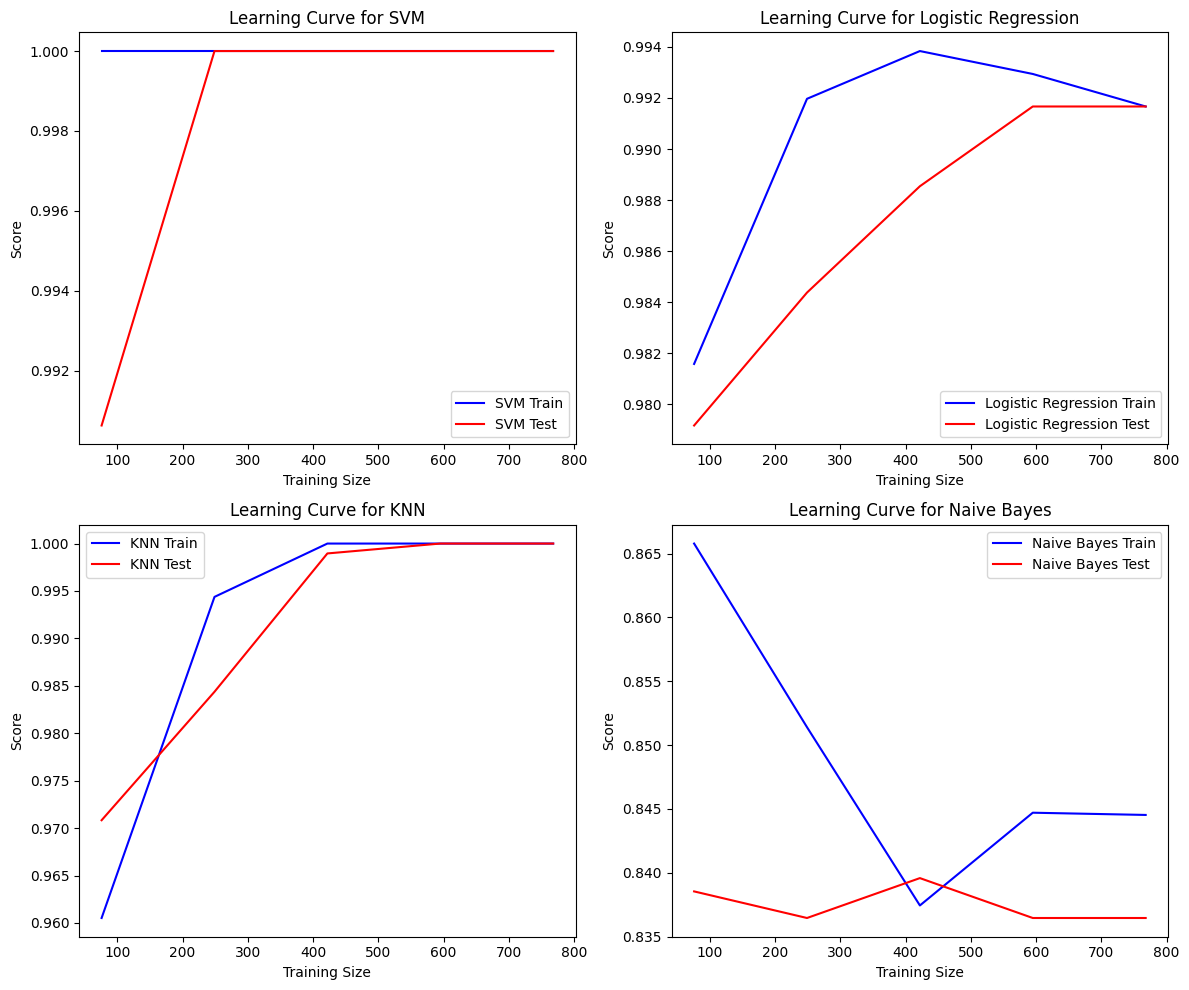

In [86]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, ax, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
    ax.plot(train_sizes, train_scores.mean(axis=1), label=f'{model_name} Train', color='blue')
    ax.plot(train_sizes, test_scores.mean(axis=1), label=f'{model_name} Test', color='red')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Score')
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_learning_curve(svm, X_train, y_train, axes[0, 0], 'SVM')
plot_learning_curve(log, X_train, y_train, axes[0, 1], 'Logistic Regression')
plot_learning_curve(knn, X_train, y_train, axes[1, 0], 'KNN')
plot_learning_curve(gnb, X_train, y_train, axes[1, 1], 'Naive Bayes')

plt.tight_layout()
plt.show()

###Metrics (Specificity)
Mengukur kemampuan model dalam mengidentifikasi negative class.

In [84]:
specificity_svm = cm_SVM[0, 0] / (cm_SVM[0, 0] + cm_SVM[0, 1])
specificity_log = cm_log[0, 0] / (cm_log[0, 0] + cm_log[0, 1])
specificity_knn = cm_knn[0, 0] / (cm_knn[0, 0] + cm_knn[0, 1])
specificity_nb = cm_mnb[0, 0] / (cm_mnb[0, 0] + cm_mnb[0, 1])

print(f"Specificity for SVM: {specificity_svm:.2f}")
print(f"Specificity for Logistic Regression: {specificity_log:.2f}")
print(f"Specificity for KNN: {specificity_knn:.2f}")
print(f"Specificity for Naive Bayes: {specificity_nb:.2f}")

Specificity for SVM: 1.00
Specificity for Logistic Regression: 0.99
Specificity for KNN: 1.00
Specificity for Naive Bayes: 0.90


##Hasil setiap Model

1. **Logistic Regression**

- Precision: 0.99 (kelas 0), 0.98 (kelas 1)
- Recall: 0.99 (kelas 0), 0.99 (kelas 1)
- F1-score: 0.99 (kelas 0), 0.99 (kelas 1)
- Akurasi: 98.79%
- Cross-validation accuracy: 99.0% ± 1.0%
- Specificity: 0.99
- Kesimpulan: Logistic Regression menunjukkan hasil yang sangat baik dengan akurasi tinggi (98.79%) dan keseimbangan yang baik antara precision dan recall pada kedua kelas. Namun, meskipun performanya sangat baik, cross-validation menunjukkan sedikit fluktuasi dalam akurasi (0.99 ± 1.0%), yang berarti ada sedikit ketidakpastian dalam generalisasi model.

2. **K-Nearest Neighbors (KNN)**

- Precision: 1.00 (kelas 0), 1.00 (kelas 1)
- Recall: 1.00 (kelas 0), 1.00 (kelas 1)
- F1-score: 1.00 (kelas 0), 1.00 (kelas 1)
- Akurasi: 100.0%
- Cross-validation accuracy: 100.0% ± 0.0%
- Specificity: 1.00
- Kesimpulan: KNN memberikan hasil yang sempurna dengan akurasi 100%, menunjukkan precision dan recall sempurna untuk kedua kelas. Cross-validation juga menunjukkan konsistensi yang sangat baik tanpa fluktuasi (100% ± 0.0%). Ini menunjukkan bahwa model ini sangat stabil dan dapat diandalkan.

3. **Naive Bayes**

- Precision: 0.82 (kelas 0), 0.86 (kelas 1)
- Recall: 0.90 (kelas 0), 0.75 (kelas 1)
- F1-score: 0.86 (kelas 0), 0.80 (kelas 1)
- Akurasi: 83.74%
- Cross-validation accuracy: 84.0% ± 2.0%
- Specificity: 0.90
- Kesimpulan: Naive Bayes menunjukkan kinerja yang lebih rendah dibandingkan dengan model lainnya, dengan akurasi 83.74%. Meskipun memiliki precision yang cukup baik pada kelas 1, recall untuk kelas 1 lebih rendah, yang mengindikasikan bahwa model ini tidak sepenuhnya mampu mengidentifikasi kasus positif dengan baik. Cross-validation menunjukkan variasi (84% ± 2.0%), yang mengindikasikan ada fluktuasi dalam kinerja model di berbagai subset data.

4. **Support Vector Machine (SVM)**

- Precision: 1.00 (kelas 0), 1.00 (kelas 1)
- Recall: 1.00 (kelas 0), 1.00 (kelas 1)
- F1-score: 1.00 (kelas 0), 1.00 (kelas 1)
- Akurasi: 100.0%
- Cross-validation accuracy: 100.0% ± 0.0%
- Specificity: 1.00
- Kesimpulan: SVM memberikan hasil yang sempurna dengan akurasi 100%, recall dan precision yang sangat baik untuk kedua kelas, serta kinerja stabil berdasarkan cross-validation (100% ± 0.0%). Specificity 1.00 menunjukkan bahwa model ini sangat baik dalam mengidentifikasi kelas negatif. SVM adalah salah satu model terbaik dalam eksperimen ini.

##Kesimpulan

**Perbandingan Model**
- Akurasi: KNN dan SVM memberikan akurasi tertinggi (100%), sementara Logistic - Regression mendekati 99%, dan Naive Bayes memiliki akurasi terendah (83.74%).
- Cross-validation: KNN dan SVM menunjukkan stabilitas yang sangat baik dengan akurasi 100% di seluruh fold, sementara Logistic Regression menunjukkan sedikit fluktuasi dan Naive Bayes memiliki variasi terbesar.
- Specificity: KNN, SVM, dan Logistic Regression menunjukkan specificity yang sangat baik (1.00), dengan Naive Bayes sedikit lebih rendah (0.90).

**Kesimpulan Umum**
- KNN dan SVM adalah dua algoritma dengan kinerja terbaik dalam hal akurasi, precision, recall, dan stabilitas melalui cross-validation.
Logistic Regression juga menunjukkan kinerja yang sangat baik tetapi sedikit lebih bervariasi.
- Naive Bayes cenderung memiliki kinerja yang lebih rendah dibandingkan dengan ketiga model lainnya, terutama dalam hal recall untuk kelas 1.

**Kesimpulan Akhir**

Berdasarkan hasil ini, SVM dan KNN adalah pilihan terbaik untuk model klasifikasi ini, dengan SVM memberikan sedikit keunggulan dalam hal generalisasi dan stabilitas.